**TO-DO**
* assinalar que owners é que têm um disponent

## Table Of Contents <a id="index"></a>


- [Dataset managing](#dataset)  
- [District Data](#district-data)
- [Data Exploration](#data-exploration)
- [Matrix](#matrix)
  

#### Models
- [**Decision Tree**](#decision-tree)
    - [**Parameter Tunning**](#parameter-tunning)
- [**K-Nearest Neighbor**](#k-nearest-neighbor)
    - [**Parameter Tunning**](#parameter-tunning-2)  
- [**Support-Vector Machines**](#support-vector-machines)
    - [**Parameter Tunning**](#parameter-tunning-3)
- [**Neural Networks**](#neural-networks)
    - [**Parameter Tunning**](#parameter-tunning-4)
- [**Logistic Regression**](#logistic-regression)
    - [**Parameter Tunning**](#parameter-tunning-5)
- [**Naive Bayes**](#naive-bayes)
    - [**Parameter Tunning**](#parameter-tunning-6)
- [**Random Forest**](#random-forest)
    - [**Parameter Tunning**](#parameter-tunning-7)
- [**XGBoost**](#xgboost)
    - [**Parameter Tunning**](#parameter-tunning-8)
- [**MLP**](#mlp)
    - [**Parameter Tunning**](#parameter-tunning-9)
- [**Ada Boost**](#ada-boost)
    - [**Parameter Tunning**](#parameter-tunning-10)
- [**Voting**](#voting)

#### [Apply Model](#apply-model)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import plotly.graph_objects as go
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV

In [ ]:
def dataset(x, missing = ""):
    return pd.read_csv('Dataset/' + x + '.csv', sep = ';', low_memory = False, na_values = missing_values).rename(str.strip, axis = 'columns')
    

In [ ]:
def abs_min(x):
    return x.abs().min()
abs_min.__name__ = 'abs_min'

def rangev(x):
    return x.max() - x.min()
rangev.__name__ = 'range'

def age_days(x):
    return (x.max()-x.min()).days

Functions for getting number of operations

In [ ]:
def count_credit_cash(val):
    return sum(val=="credit in cash")
def count_collect(val):
    return sum(val=="collection from another bank")
def count_with_cash(val):
    return sum(val=="withdrawal in cash")
def count_remi(val):
    return sum(val=="remittance to another bank")
def count_with_card(val):
    return sum(val=="credit card withdrawal")
def count_interest(val):
    return sum(val=="interest credited")

def count_withdrawal(val):
    return sum(val=="withdrawal")
def count_credit(val):
    return sum(val=="credit")

Functions for getting the mean of the operations

In [ ]:
def mean_credit_cash(val):
    return np.mean(val=="credit in cash")
def mean_collect(val):
    return np.mean(val=="collection from another bank")
def mean_with_cash(val):
    return np.mean(val=="withdrawal in cash")
def mean_remi(val):
    return np.mean(val=="remittance to another bank")
def mean_with_card(val):
    return np.mean(val=="credit card withdrawal")
def mean_interest(val):
    return np.mean(val=="interest credited")

def mean_withdrawal(val):
    return np.mean(val=="withdrawal")
def mean_credit(val):
    return np.mean(val=="credit")

Functions for getting the standard deviation of the operations

In [ ]:
def std_credit_cash(val):
    return np.std(val=="credit in cash")
def std_collect(val):
    return np.std(val=="collection from another bank")
def std_with_cash(val):
    return np.std(val=="withdrawal in cash")
def std_remi(val):
    return np.std(val=="remittance to another bank")
def std_with_card(val):
    return np.std(val=="credit card withdrawal")
def std_interest(val):
    return np.std(val=="interest credited")


def std_withdrawal(val):
    return np.std(val=="withdrawal")
def std_credit(val):
    return np.std(val=="credit")

Functions for getting the covariance of the operations

In [ ]:
def cov_credit_cash(val):
    return np.cov(val=="credit in cash")
def cov_collect(val):
    return np.cov(val=="collection from another bank")
def cov_with_cash(val):
    return np.cov(val=="withdrawal in cash")
def cov_remi(val):
    return np.cov(val=="remittance to another bank")
def cov_with_card(val):
    return np.cov(val=="credit card withdrawal")
def cov_interest(val):
    return np.cov(val=="interest credited")

def cov_withdrawal(val):
    return np.cov(val=="withdrawal")
def cov_credit(val):
    return np.cov(val=="credit")

In [ ]:
missing_values = ['?', 'NA', '']
account_data = dataset('account', missing_values)
client_data = dataset('client', missing_values)
disp_data = dataset('disp', missing_values)
district_data = dataset('district', missing_values)
card_train = dataset('card_train', missing_values)
card_test = dataset('card_test')
loan_train = dataset('loan_train', missing_values)
loan_test = dataset('loan_test')
trans_train = dataset('trans_train', missing_values)
trans_test = dataset('trans_test')

We can see the distribution of the district regions for each one of the different regions.

In [ ]:
plt.figure(figsize=(15,8))
sb.countplot(x='region', data=district_data)
plt.title("Number of districts per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Region');
plt.ylabel('Number of districts from region');
plt.show()

To study if the region might have an impact on the acceptance of the loan we will create a graph comparing the percentages of successful loans per region.

In [ ]:
district_data_region = district_data.copy()
region_data = loan_train
region_data = pd.merge(region_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
region_data = pd.merge(region_data, account_data, on = 'account_id', suffixes = ('', '_account'))
#train_data = train_data.dropna()
region_data = pd.merge(region_data, district_data_region.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))

region_total = region_data["region"].value_counts()
tuples_total = [tuple((x, y)) for x, y in region_total.items()]

regions_status_1 = region_data.loc[region_data['status'] == 1]
region_total_1 = regions_status_1["region"].value_counts()
tuples_total_1 = [tuple((x, y)) for x, y in region_total_1.items()]

lista=[]
for x in tuples_total:
    for y in tuples_total_1:
        if x[0]==y[0]:
            lista.append((x[0],x[1],y[1]))

percentages = [(i[0],i[2] / i[1]) for i in lista]
percentages.sort(key = lambda x: -x[1])

x = [i[0] for i in percentages]
y = [i[1] for i in percentages]

plt.figure(figsize=(15,8))
sb.barplot(x,y)
plt.ylim(0.7, 1)
plt.title("Percentage of successful loans per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Region');
plt.ylabel('Percentage of successful loans');
plt.show()

Now let's see the different values the parameter type can have.

In [ ]:
disp_data_pie = disp_data.copy()

ser = disp_data_pie.groupby('type')['type'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.title('Type of disposition', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.set_size_inches(15, 5)

Since only owner can issue permanent orders and ask for a loan, there is no interess in keeping this parameter in our dataset.

In [ ]:
# Removing name and region from district
district_data.drop(['name', 'region'], axis=1, inplace=True)

# only owner can issue permanent orders and ask for a loan
disp_owners = disp_data[disp_data.type.eq('OWNER')]
disp_owners.drop(['type'], axis=1, inplace=True)

As *birth_number* column doesn't add any value to our model as it is in the original data (it's represented as an int in format YYMMDD for men and YYMM+50DD for women), let's put it in format YY-MM-DD and create a new column called *genre*.

In [ ]:
# Normalize birthday dates and add a new column (Genre) to distinguish

birth_dates = client_data['birth_number']
dates_parsed = []
genre = []
for date in birth_dates:
    month = int(str(date)[2:4])
    if month > 12:
        genre.append(0)
        month = month - 50
        if month < 10:
            month = '0' + str(month)
        else:
            month = str(month)
    else:
        #print('AAAA: ' + str(month))
        if month < 10:
            month = '0' + str(month)
            #print('BBBB: ' + str(month))
        else:
            month = str(month)
        genre.append(1)
    dates_parsed.append(str(date)[:2] + '-' + month + '-' + str(date)[4:])
    

# client_data = client_data.drop(['birth_number'], axis = 1)
client_data['birth_number'] = dates_parsed
client_data['genre'] = genre
client_data.head()

We can also see the *genre* distribution, where 1 means male and 0 female.

In [ ]:
client_data_genre_copy = client_data.copy()

ser = client_data_genre_copy.groupby('genre')['genre'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=["Male","Female"], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.title('Genre distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.set_size_inches(15, 5)

In [ ]:
# build train dataset

train_data = loan_train
train_data = pd.merge(train_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
train_data = pd.merge(train_data, account_data, on = 'account_id', suffixes = ('', '_account'))
#train_data = train_data.dropna()
train_data = pd.merge(train_data, district_data.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
train_data = pd.merge(train_data, disp_owners, on = 'account_id', suffixes = ('', '_disp'))
train_data = pd.merge(train_data, card_train, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
train_data = pd.merge(train_data, client_data, on = 'client_id', suffixes = ('', '_client'))
train_data = train_data.drop(['district_id_client'], axis=1)
train_data.info()

In [ ]:
train_data.head()

In [ ]:
# build test dataset

test_data = loan_test
test_data = pd.merge(test_data, trans_test, on = 'account_id', suffixes = ('', '_trans'))
test_data = pd.merge(test_data, account_data, on = 'account_id', suffixes = ('', '_account'))
test_data = pd.merge(test_data, district_data.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
test_data = pd.merge(test_data, disp_owners, on = 'account_id', suffixes = ('', '_disp'))
test_data = pd.merge(test_data, card_test, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
test_data = pd.merge(test_data, client_data, on = 'client_id', suffixes = ('', '_client'))
test_data = test_data.drop(['district_id_client'], axis=1)
test_data.info()


In [ ]:
test_data.head()

Now we can create a column *age_loan* where we will keep the age of the client at the time of the requested loan.

In [ ]:
from datetime import date

#print(len(birth_dates))
#print(sorted(birth_dates))
 
def calculateAge(birthDate, loanDate):
    loan = loanDate.split("-")
    loan_date = date(int(loan[0]), int(loan[1]), int(loan[2]))
    birth = birthDate.split("-")
    
    birth_date = date(int(birth[0]), int(birth[1]), int(birth[2]))
    return (int((loan_date-birth_date).days/365))

In [ ]:
loan_dates = train_data['date']

loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_dates]

birth_dates = train_data['birth_number']

#print(sorted(birth_dates))

age_list = [calculateAge(birth_dates[n],loan_dates[n]) for n in range(0,len(birth_dates))]

train_data["age_loan"] = age_list

# print(train_data["age_loan"])

Now let's do the same for the test data.

In [ ]:
loan_dates = test_data['date']

loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_dates]

birth_dates = test_data['birth_number']

age_list = [calculateAge(birth_dates[n],loan_dates[n]) for n in range(0,len(test_data))]

test_data["age_loan"] = age_list

# print(test_data["age_loan"])

Also, let's create a new column that calculates the age of each client when he creates the account (*age_account*).

In [ ]:
account_dates_train = train_data['date_account']
account_dates_test = test_data['date_account']

account_dates_train = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in account_dates_train]
account_dates_test = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in account_dates_test]

age_list_train = [calculateAge(birth_dates[n],account_dates_train[n]) for n in range(0,len(train_data))]
age_list_test = [calculateAge(birth_dates[n],account_dates_test[n]) for n in range(0,len(test_data))]

train_data['age_account'] = age_list_train
test_data['age_account'] = age_list_test

# print(train_data["age_account"])

Now, let's simplify *age_loan* and *age_account* values, converting them into age ranges divided by decades.

In [ ]:
def get_decade(year):
    year_int = int(year)
    string = str(year_int//10) + "0-" + str(year_int//10) + "9"
    return string

In [ ]:
def get_balance(year):
    year_int = int(float(year))
    string = "1" + "0"*(len(str(year_int))-1) + "-" + "9" + "9"*(len(str(year_int))-1)
    return string

In [ ]:
age_loan_train = train_data['age_loan'].astype(str)
age_loan_test = test_data['age_loan'].astype(str)

age_loan_train = [get_decade(age_loan_train[n]) for n in range(0, len(train_data))]
age_loan_test = [get_decade(age_loan_test[n]) for n in range(0, len(test_data))]

train_data['age_loan_range'] = age_loan_train
test_data['age_loan_range'] = age_loan_test

train_data.head(10)

In [ ]:
age_loan_train = train_data['age_account'].astype(str)
age_loan_test = test_data['age_account'].astype(str)

age_loan_train = [get_decade(age_loan_train[n]) for n in range(0, len(train_data))]
age_loan_test = [get_decade(age_loan_test[n]) for n in range(0, len(test_data))]

train_data['age_account_range'] = age_loan_train
test_data['age_account_range'] = age_loan_test

train_data.head(10)

In [ ]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.astype({'age_loan': str})

train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

train_data_copy = train_data_copy.sort_values('age_loan')

fig = plt.figure()
plt.figure(figsize=(15,8))
plt.title("Age by decade at the date of the loan", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax = sb.countplot(x="age_loan", data=train_data_copy)
plt.show()

Now we can see the months when the accounts were created.

In [ ]:
def get_month(year):
    string = year[2:4] + "/" + year[0:2]
    return string

In [ ]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.sort_values('date_account')
train_data_copy = train_data_copy.astype({'date_account': str})

train_data_copy['date_account'] = train_data_copy['date_account'].apply(lambda x: get_month(x[0:4]))

fig = plt.figure()
plt.figure(figsize=(25,20))
plt.title("Date of creation of the account per month")
ax = sb.countplot(x="date_account", data=train_data_copy)
plt.show()

We can also see the month and year of when the loans were created and their relation to the number of successful loans.

In [ ]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.sort_values('date')
train_data_copy = train_data_copy.astype({'date': str})

train_data_copy['date'] = train_data_copy['date'].apply(lambda x: get_month(x[0:4]))

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

fig = plt.figure()
plt.figure(figsize=(25,20))
plt.title("Number of successful loans per month", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax = sb.countplot(x ='date', hue = "status", data = train_data_copy)
plt.show()

As follows we can see the months when the most transfers were taken.

In [ ]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.sort_values('date_trans')
train_data_copy = train_data_copy.astype({'date_trans': str})

train_data_copy['date_trans'] = train_data_copy['date_trans'].apply(lambda x: get_month(x[0:4]))

fig = plt.figure()
plt.figure(figsize=(25,20))
plt.title("Months with the most tranfers", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax = sb.countplot(x="date_trans", data=train_data_copy)
plt.show()

Now that we have taken all informations that we need from all dates, we can remove these columns from our dataset.

In [ ]:
train_data.drop(['date', 'date_trans', 'date_account', 'birth_number'], axis=1, inplace=True)
test_data.drop(['date', 'date_trans', 'date_account', 'birth_number'], axis=1, inplace=True)

In [ ]:
# Null values for each attribute
train_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Null values');

We can remove *bank* and *account* columns, as these columns only record the destination account.

In [ ]:
train_data.drop(['bank', 'account'], axis=1, inplace=True)
test_data.drop(['bank', 'account'], axis=1, inplace=True)

Let's look at the possible values and the respective frequency for some columns.

In [ ]:
print(train_data.operation.value_counts())
print('Null values: ' + str(train_data.operation.isnull().sum()))
print()
print(train_data.k_symbol.value_counts())
print('Null values: ' + str(train_data.k_symbol.isnull().sum()))
print()
print(train_data.type_card.value_counts())
print('Null values: ' + str(train_data.type_card.isnull().sum()))
print()
print(train_data.type.value_counts())
print('Null values: ' + str(train_data.type.isnull().sum()))
print()

In [ ]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.loc[:, train_data_copy.columns.intersection(['type','operation'])]
train_data_copy["operation"] = train_data_copy["operation"].fillna('NaN')

train_data_copy.sort_values("operation")

print(train_data_copy["type"].unique())
print(train_data_copy["operation"].unique())

In [ ]:
sb.displot(train_data_copy,x='operation', y='type', aspect=3)
plt.xlabel('Operation');
plt.ylabel('Type');
plt.title("Comparition between Operation and Type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

As we can see all the rows with operation *credit in cash* and *collection from another bank* are of type credit. All the *withdrawal in cash*, *remittance to another bank* and *credit cash withdrawal* operations are of the type *withdraw* or *withdrawal with cash* (in the case of the homonymous operation)

In [ ]:
train_data_copy = train_data.copy()
print(train_data_copy.operation.value_counts())
train_data_copy = train_data_copy.groupby(['k_symbol', 'operation'])['operation'].count()
print(train_data_copy)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.xlabel('K_symbol');
plt.ylabel('Quantity');
plt.title("Number of operation types per k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
train_data_copy = train_data.copy()
train_data_copy["operation"]=train_data_copy["operation"].fillna("Not Available")
train_data_copy["k_symbol"]=train_data_copy["k_symbol"].fillna("Not Available")
train_data_copy['k_symbol'] = train_data_copy['k_symbol'].replace([' '],['Not Available'])
train_data_copy['operation'] = train_data_copy['operation'].replace([''],['Not Available'])

fig = plt.figure()

sb.catplot(x="operation", hue="k_symbol", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_data_copy, height=10, aspect=1.5)
plt.title('Relation between k_symbols and operation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylim(0)
plt.rcParams['figure.figsize']=(20,10)
plt.show()


As we can see the great majority of the k_symbol types are directly related to a certain operation type

Looking for **type** column, let's convert all *withdrawal in cash* occurrences into *withdrawal*, as it is basically the same. 

In [ ]:
train_data.loc[train_data['type'] == "withdrawal in cash", 'type'] = "withdrawal"
test_data.loc[test_data['type'] == "withdrawal in cash", 'type'] = "withdrawal"

Now, looking at *operation* and *k_symbol* columns, let's select all rows that have null value in *operation* and look at the respective value in *k_symbol* value.

In [ ]:
operations_null = train_data[train_data['operation'].isnull()]
operations_null.k_symbol.value_counts()

All rows that have **operation** column with null value have *interested credited* in *k_symbol* column. We can try to replace the null values of *operation* column with the value that is in *k_symbol* column and then delete *k_symbol* parameter.

In [ ]:
train_data.loc[train_data['operation'].isna(), 'operation'] = train_data.loc[train_data['operation'].isna(), 'k_symbol']
test_data.loc[test_data['operation'].isna(), 'operation'] = test_data.loc[test_data['operation'].isna(), 'k_symbol']

train_data.drop(['k_symbol'], axis=1, inplace=True)
test_data.drop(['k_symbol'], axis=1, inplace=True)

In [ ]:
train_data.info()

Representation of the Card Type, with NaN values

In [ ]:
train_data_copy = train_data.copy()

train_data_copy['type_card'] = train_data_copy['type_card'].fillna("NaN")

ser = train_data_copy.groupby('type_card')['type_card'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1,2,3]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=['','','',''], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend(loc=3, labels=ser.index)
plt.axis('equal')
plt.title('Card Type distribution', y=1.05, fontsize=20)
fig.set_size_inches(15, 5)

Representation of the Card Type, without NaN values

In [ ]:
train_data_copy = train_data.copy()

ser = train_data_copy.groupby('type_card')['type_card'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1,2]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.title('Card Type distribution', y=1.05, fontsize=20)
fig.set_size_inches(15, 5)

In [ ]:
train_data_copy = train_data.copy()

train_data_copy['type_card'] = train_data_copy['type_card'].fillna("NaN")

ser = train_data_copy.groupby('type_card')['type_card'].count()
ser = ser.sort_values(ascending=False)
ser = ser.iloc[[0,1,2,3]]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(ser.values, labels=['','','',''], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
ax.legend(loc=3, labels=ser.index)
plt.axis('equal')
plt.title('Card Type distribution', y=1.05, fontsize=20)
fig.set_size_inches(15, 5)

[back](#index)
#### District Data <a id="district-data"></a>

In [ ]:
print_districtplot=False
if print_districtplot:
    district_scatter_plot = sb.PairGrid(district_data)
    district_scatter_plot.map(plt.scatter)

In [ ]:
print('Null values unemploymant rate in \'95:' + str(district_data['unemploymant rate \'95'].isnull().sum()))
print()
print('Null values no. of commited crimes \'95 :' + str(district_data['no. of commited crimes \'95'].isnull().sum()))
print()

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Distribution of district\'s unemploymant rate in \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.hist(district_data['unemploymant rate \'95'])

Representation of the Card Type, without NaN values

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Distribution of district\'s no. of commited crimes \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.hist(district_data['no. of commited crimes \'95'])

In [ ]:
# Fill null values in district's unemploymant rate in '95 and district's no. of commited crimes '95
# See if it is better to use median or mean 

train_data['unemploymant rate \'95'].fillna(train_data['unemploymant rate \'95'].median(), inplace=True)

train_data['no. of commited crimes \'95'].fillna(train_data['no. of commited crimes \'95'].mean(), inplace=True)

test_data['unemploymant rate \'95'].fillna(test_data['unemploymant rate \'95'].median(), inplace=True)

test_data['no. of commited crimes \'95'].fillna(test_data['no. of commited crimes \'95'].mean(), inplace=True)

[back](#index)
#### Dataset Managing <a id="dataset"></a>

In [ ]:
# needs to be checked
option = 4
if option == 0:
    train_data.drop(['issued'], axis=1, inplace=True)
    test_data.drop(['issued'], axis=1, inplace=True)
if option == 1:
    train_data.drop(['operation', 'issued'], axis=1, inplace=True)
    test_data.drop(['operation', 'issued'], axis=1, inplace=True)
# dropped type and issued
elif option == 2:
    train_data.drop(['issued', 'type'], axis=1, inplace=True)
    test_data.drop(['issued', 'type'], axis=1, inplace=True)
#doesn't work
elif option == 4:
    train_data.drop(["card_id","type_card", "issued","client_id", "disp_id"],axis=1,inplace=True)
    test_data.drop(["card_id","type_card", "issued","client_id", "disp_id"],axis=1,inplace=True)
    columns = train_data.columns.values.tolist()
    columns.remove("trans_id")
    columns.remove("amount_trans")
    columns.remove("balance")
    columns.remove("operation")
    columns.remove("type")   
    columns.remove("age_account")  
    
    train_data=train_data.groupby(columns, as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest],
        "amount_trans": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit, cov_withdrawal, cov_credit]
        
    })
    
    test_data=test_data.groupby(columns, as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest],
        "amount_trans": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit, cov_withdrawal, cov_credit]
        
    })
    train_data.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in train_data.columns]
    test_data.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in test_data.columns]
    
    


In [ ]:
train_data = pd.get_dummies(train_data, columns=['frequency'], dtype=bool)
test_data = pd.get_dummies(test_data, columns=['frequency'], dtype=bool)

train_data = pd.get_dummies(train_data, columns=['type_card'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['type_card'], dtype = bool)

train_data = pd.get_dummies(train_data, columns=['age_loan_range'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['age_loan_range'], dtype = bool)

train_data = pd.get_dummies(train_data, columns=['age_account_range'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['age_account_range'], dtype = bool)

if option != 2:
    train_data = pd.get_dummies(train_data, columns=['type'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['type'], dtype = bool)

if option != 1 :
    train_data = pd.get_dummies(train_data, columns=['operation'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['operation'], dtype = bool)

test_data = test_data.drop_duplicates(subset=['loan_id'], keep='first')

train_data.info()

In [ ]:
train_data.head()

In [ ]:
competition_inputs = test_data.drop(columns=["loan_id", "status"])
# test_data = test_data.drop(columns=["status"])
all_ids_comp = test_data['loan_id'].values

#### [back](#index)
#### Data Exploration <a class="anchor" id="data-exploration"></a>

After the previous changes we end up with the following columns to study

In [ ]:
test_data.info()

In [ ]:
plt.figure(figsize=(15,10))
ax = sb.barplot(train_data["duration"], train_data["amount"])
plt.xlabel('Duration');
plt.ylabel('Amount');
plt.title('Loan duration compared the amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

We can clearly see that with bigger loan amounts the time taken to repay them is exponentially higher 

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
ax = plt.plot(train_data["amount"], train_data["payments"], linestyle='none', marker='o', alpha=0.3)
plt.title('Number of payments per different amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Amount');
plt.ylabel('Payments');
plt.show()

As we can check by the values in the graph, it seems that the number of payments is defined by the bank since the results are very linear and follow a line according to the amount loaned

In [ ]:
plt.figure(figsize=(20,10))
#ax = sb.barplot(train_data["amount_trans"], train_data["balance"])
plt.plot(train_data["balance"],train_data["amount_trans"], 'o', color='green');
plt.title('Distribution of tranfer amount by balance', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Transfer Amount');
plt.xlabel('Balance');
plt.show()

As we can see as the balance increases the transfer amount also increase and is rarely higher than the balance. It can also be seen that a straight continous line exists with gradient 1. This means the amount of some transfers are actually correspondent, or close, to the total amount in the account.

In [ ]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

train_data_copy = train_data_copy.groupby(['no. of cities', 'status'])['status'].count().unstack().fillna(0)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.title("Number of cities per district and loan success rate", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

fig = plt.figure()
sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylim(0)
fig.set_size_inches(15, 15)
plt.show()

In [ ]:
#print(sorted(train_data["no. of inhabitants"]))

In [ ]:
train_data_copy = train_data.copy()

train_data_copy = train_data.copy()
train_data_copy = train_data_copy.astype({'age_loan': str})

train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

train_data_copy = train_data_copy.groupby(['age_loan', 'status'])['status'].count().unstack().fillna(0)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.title("Loan success rate per decade of age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.astype({'status': str})
train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

train_data_copy = train_data_copy.groupby(['genre', 'status'])['status'].count().unstack().fillna(0)

plt.rcParams["figure.figsize"] = (15,10)
train_data_copy.plot(kind='bar', stacked=True)
plt.title("Loan success rate per decade of genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
plt.figure(figsize=(15,10))

train_data_names = train_data.copy()
train_data_names["genre"] = train_data_names["genre"].astype(str)
train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

sb.scatterplot(train_data_names["amount"],train_data_names["age_loan"],train_data_names["genre"], alpha=0.5, sizes=(10, 1000), hue="time")
plt.xlabel("Amount")
plt.ylabel("Age")
plt.title("Amount by age and genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
train_data_names = train_data.copy()

train_data_names = train_data_names.astype({'age_loan': str})

train_data_names['age_loan'] = train_data_names['age_loan'].apply(lambda x: get_decade(x))

train_data_names = train_data_names.sort_values('age_loan')

plt.figure(figsize=(15,10))

sb.boxplot(x=train_data_names["age_loan"], y=train_data_names["amount"])
plt.title("Loan amount by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
train_data.info()

In [ ]:
train_data_ages = train_data.copy()

train_data_ages = train_data_ages.astype({'age_loan': str})

train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

train_data_ages = train_data_ages.astype({'age_account': str})

train_data_ages['age_account'] = train_data_ages['age_account'].apply(lambda x: get_decade(x))

train_data_names = train_data_ages.sort_values('age_loan')
sb.barplot(x='age_account', y='amount', hue='age_loan', data=train_data_ages, saturation=0.8)
plt.title("Date of creation of account compared to amount and age when the loan was made", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
train_data_ages = train_data.copy()

train_data_ages = train_data_ages.astype({'age_loan': str})

train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

train_data_balance = train_data_ages.astype({'balance': str})

train_data_balance['balance'] = train_data_balance['balance'].apply(lambda x: get_balance(x))

train_data_balance = train_data_balance.sort_values('balance')
sb.boxplot(x='balance', y='amount', hue='age_loan', data=train_data_balance, saturation=0.8)
plt.title("Balance and amount of loan by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [ ]:
plt.figure(figsize=(15,10))

train_data_names = train_data.copy()
train_data_names["genre"] = train_data_names["genre"].astype(str)
train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

sb.scatterplot(train_data_names["average salary"],train_data_names["age_loan"],train_data_names["district_id"], alpha=0.5, sizes=(10, 1000), hue="time")
plt.xlabel("Average Salary")
plt.ylabel("Age")
plt.title("Average Salary by age and district", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

As follows we can see the average salary by age

In [ ]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.astype({'age_loan': str})

train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

train_data_copy = train_data_copy.sort_values('age_loan')
train_data_copy["average salary"] = train_data_copy["average salary"].astype(float)

fig = plt.figure()
sb.boxplot(x=train_data_copy["age_loan"], y=train_data_copy["average salary"])
plt.xlabel('age_loan', y=1.05, fontsize=15, labelpad=15)
plt.ylabel('average salary', x=0.7, fontsize=15, labelpad=15)
plt.title('Average salary per decade of age', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.set_size_inches(15, 10)
plt.show()

In [ ]:
train_data_copy = train_data.copy()
train_data_copy["genre"] = train_data_copy["genre"].astype(str)
train_data_copy["genre"].replace({"0": "Female","1": "Male"}, inplace=True)

plt.figure(figsize=(15,10))
plt.ylim(9000, 10000)
sb.barplot(x = train_data_copy["genre"], y = train_data_copy["average salary"])
plt.title("Average Salary by genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
# display
plt.show()

[back](#index)
#### Matrix <a id="matrix"></a>

train_data_w /test_data_w : train/test data where withdrawals in cash are replaced by withdrawals

4 Dropped columns: ["unemploymant rate '96", "no. of commited crimes '95", "no. of commited crimes '96", 'type_withdrawal']


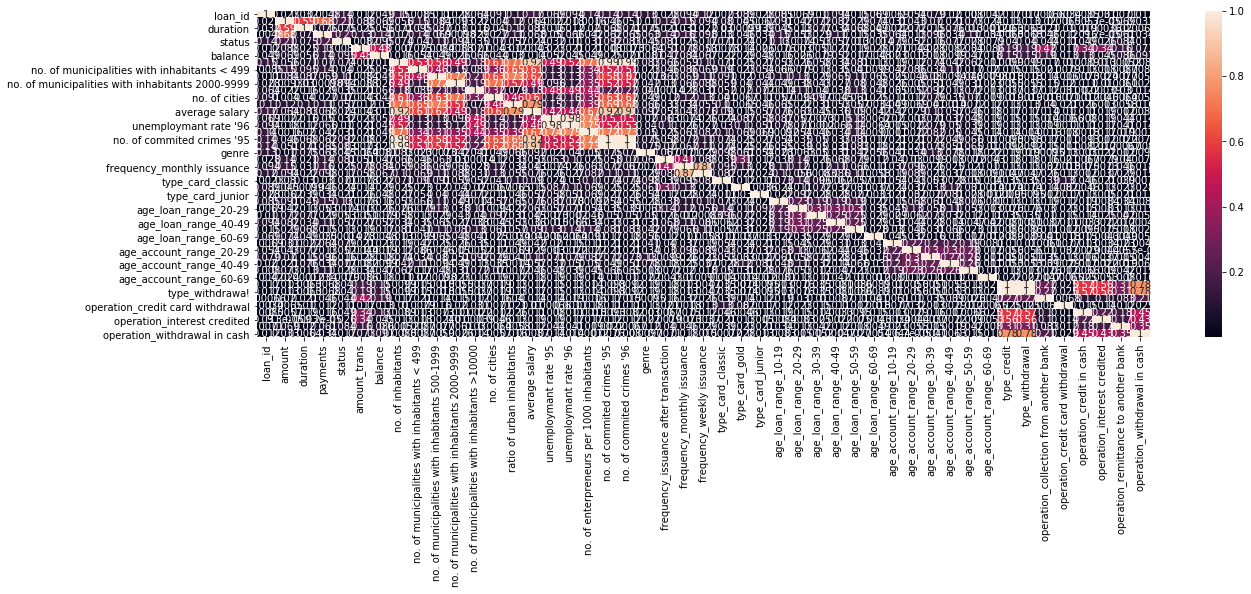

In [72]:
# Dropping ids
#train_data_no_ids = train_data.drop(['loan_id', 'account_id', 'district_id', 'disp_id', 'client_id', 'card_id', 'trans_id'], axis=1)
train_data_no_ids = train_data.drop(['client_id', 'account_id', 'district_id', 'disp_id', 'card_id', 'trans_id', 'age_loan', 'age_account'], axis=1)
test_data_no_ids = test_data.drop(['client_id', 'account_id', 'district_id', 'disp_id', 'card_id', 'trans_id', 'age_loan', 'age_account'], axis=1)


# Create correlation matrix
corr_matrix = train_data_no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix, annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
train_data_no_ids.drop(to_drop, axis=1, inplace=True)
test_data_no_ids.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )

In [73]:
train_data_no_ids.head()

,loan_id,amount,duration,payments,status,amount_trans,balance,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,...,age_account_range_40-49,age_account_range_50-59,age_account_range_60-69,type_credit,operation_collection from another bank,operation_credit card withdrawal,operation_credit in cash,operation_interest credited,operation_remittance to another bank,operation_withdrawal in cash
0,5314.0,96396.0,12.0,8033.0,-1.0,1100.0,1100.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
1,5314.0,96396.0,12.0,8033.0,-1.0,9900.0,11000.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
2,5314.0,96396.0,12.0,8033.0,-1.0,5800.0,16800.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
3,5314.0,96396.0,12.0,8033.0,-1.0,3300.0,20100.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
4,6903.0,52128.0,24.0,2172.0,1.0,900.0,900.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False


In [74]:
# Removing rows with nan values for status
#train_data_no_ids.dropna(subset=["status"], inplace=True)

#print(no_ids.drop_duplicates(inplace=True)
print(train_data_no_ids["status"].value_counts())

 1.0    21524
-1.0     2970
Name: status, dtype: int64


In [75]:
train_data_no_ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24494 entries, 0 to 24493
Data columns (total 43 columns):
loan_id                                             24494 non-null float64
amount                                              24494 non-null float64
duration                                            24494 non-null float64
payments                                            24494 non-null float64
status                                              24494 non-null float64
amount_trans                                        24494 non-null float64
balance                                             24494 non-null float64
no. of inhabitants                                  24494 non-null float64
no. of municipalities with inhabitants < 499        24494 non-null float64
no. of municipalities with inhabitants 500-1999     24494 non-null float64
no. of municipalities with inhabitants 2000-9999    24494 non-null float64
no. of municipalities with inhabitants >10000       24494 non-null

In [76]:
train_data_no_ids.head()

,loan_id,amount,duration,payments,status,amount_trans,balance,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,...,age_account_range_40-49,age_account_range_50-59,age_account_range_60-69,type_credit,operation_collection from another bank,operation_credit card withdrawal,operation_credit in cash,operation_interest credited,operation_remittance to another bank,operation_withdrawal in cash
0,5314.0,96396.0,12.0,8033.0,-1.0,1100.0,1100.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
1,5314.0,96396.0,12.0,8033.0,-1.0,9900.0,11000.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
2,5314.0,96396.0,12.0,8033.0,-1.0,5800.0,16800.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
3,5314.0,96396.0,12.0,8033.0,-1.0,3300.0,20100.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False
4,6903.0,52128.0,24.0,2172.0,1.0,900.0,900.0,94812.0,15.0,13.0,...,False,False,False,True,False,False,True,False,False,False


In [77]:
all_inputs = train_data_no_ids[train_data_no_ids.columns.drop(['loan_id', 'status'])]
all_labels = train_data_no_ids['status'].values

# competition_inputs = test_data_no_ids.drop(columns=["loan_id"])
# all_ids_comp = test_data_no_ids['loan_id'].values

#all_inputs = train_data_no_ids.iloc[:, :-1].values
#all_labels = train_data_no_ids.iloc[:, -1].values

In [78]:
# get a test dataset with 25% of the credit_data_subset
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#### [back](#index)
## Classifiers <a class="anchor" id="classifiers"></a>

In [ ]:
model = 5

if model == 0:
    classifier = DecisionTreeClassifier()
elif model == 1:
    classifier = KNeighborsClassifier()
elif model == 2:
    classifier = SVC(probability=True)
elif model == 3:
    scaler = StandardScaler()

    # Fit only to the training data
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    X_train_nn = scaler.transform(X_train)
    X_test_nn = scaler.transform(X_test)

    # Create the classifier
    classifier = MLPClassifier(random_state=1, max_iter=500) 
elif model == 4:
    classifier = LogisticRegression()
elif model == 5:
    classifier = GaussianNB()
elif model == 6:
    classifier = RandomForestClassifier(300)
elif model == 7:
    classifier = XGBClassifier()
elif model == 8:
    classifier = MLPClassifier(alpha=1, max_iter=1000)
elif model == 9:
    classifier = AdaBoostClassifier()
elif model == 10:
    classifier = VotingClassifier(
     estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
     voting='hard', weights=[1,1,1]
)
    
classifier.fit(X_train, y_train)
classifier_prediction = classifier.predict(X_test)

classifier_classification_report = classification_report(y_test, classifier_prediction, output_dict=True)

print(f"Classification report:\n{classification_report(y_test, classifier_prediction)}\n")

sb.set(font_scale=1.0)
 
ax = plt.subplot()

confusion_matrix_dtc = confusion_matrix(y_test, classifier_prediction)

sb.heatmap(confusion_matrix_classifier, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Decision Tree <a class="anchor" id="decision-tree"></a>



C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00     16134
         pay       1.00      1.00      1.00     16134

    accuracy                           1.00     32268
   macro avg       1.00      1.00      1.00     32268
weighted avg       1.00      1.00      1.00     32268




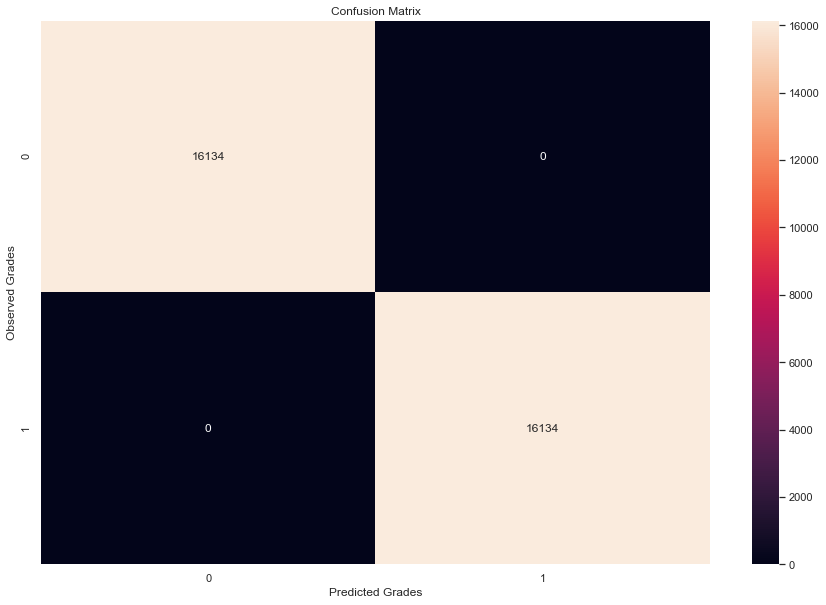

TEST
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       734
         pay       1.00      1.00      1.00      5390

    accuracy                           1.00      6124
   macro avg       1.00      1.00      1.00      6124
weighted avg       1.00      1.00      1.00      6124



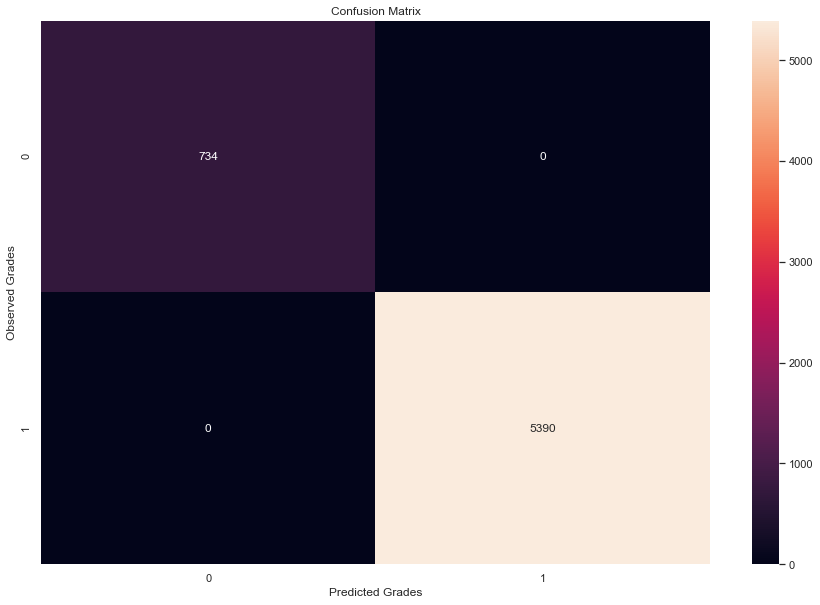

In [82]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Feature Selection
decision_tree_classifier = RFECV(decision_tree_classifier, scoring='roc_auc')

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

dtc_prediction = decision_tree_classifier.predict(X_test)

dtc_classification_report = classification_report(y_test, dtc_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = decision_tree_classifier.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = decision_tree_classifier.predict(X_test) 
f1_dt = f1_score(y_test, predictions_test)
roc_dt = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_dt))
print(f"ROC: {roc_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()


### Parameter Tunning <a class="anchor" id="parameter-tunning"></a>

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

Best score: 0.9523228094415005
TRAIN
F1 Score: 0.9947575766975835
ROC: 0.9947626131151606
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.99      1.00      0.99     16134
         pay       1.00      0.99      0.99     16134

    accuracy                           0.99     32268
   macro avg       0.99      0.99      0.99     32268
weighted avg       0.99      0.99      0.99     32268



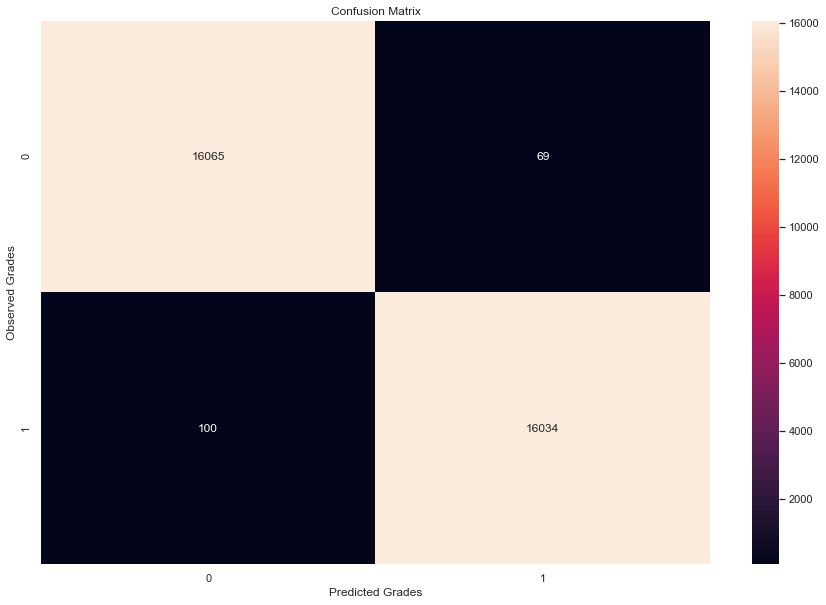

TEST
F1 Score: 0.9948841968189006
ROC: 0.9872483102728334
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.94      0.98      0.96       734
         pay       1.00      0.99      0.99      5390

    accuracy                           0.99      6124
   macro avg       0.97      0.99      0.98      6124
weighted avg       0.99      0.99      0.99      6124



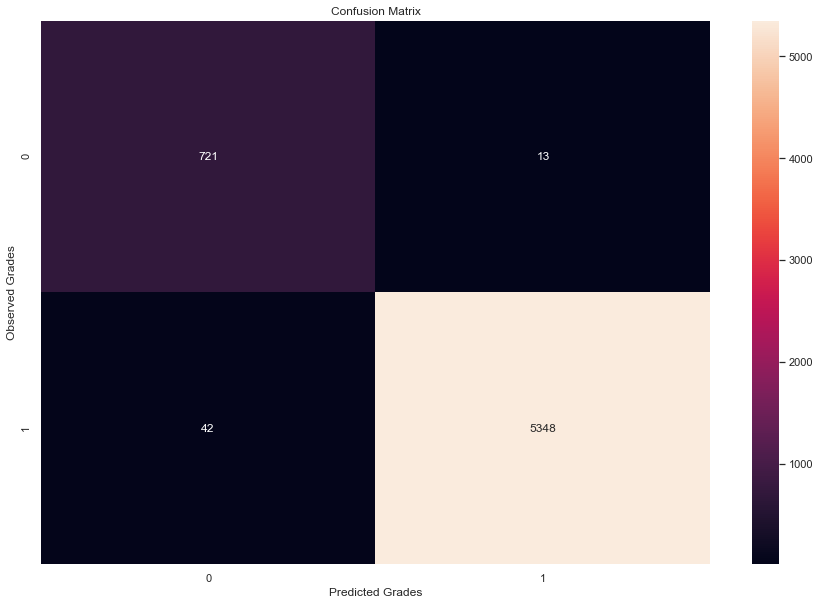

In [84]:
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1, 10),
                  'max_features': range(10,20)}

# grid_search = GridSearchCV(DecisionTreeClassifier(),
#                            param_grid=parameter_grid,
#                            cv=10,
#                            verbose=4,
#                            n_jobs=-1)

dt_classifier = DecisionTreeClassifier(min_samples_leaf = 10)

dt_grid_search = GridSearchCV(dt_classifier, scoring="precision_weighted", cv=10, param_grid=parameter_grid)
dt_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(dt_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = dt_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = dt_grid_search.predict(X_test) 
f1_dt_tun = f1_score(y_test, predictions_test)
roc_f1_dt = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_dt_tun))
print(f"ROC: {roc_f1_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## K-Nearest Neighbor <a class="anchor" id="k-nearest-neighbor"></a>

TRAIN
F1 Score: 0.9905285861648588
ROC: 0.9906098921532167
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.98      1.00      0.99     16134
         pay       1.00      0.98      0.99     16134

    accuracy                           0.99     32268
   macro avg       0.99      0.99      0.99     32268
weighted avg       0.99      0.99      0.99     32268




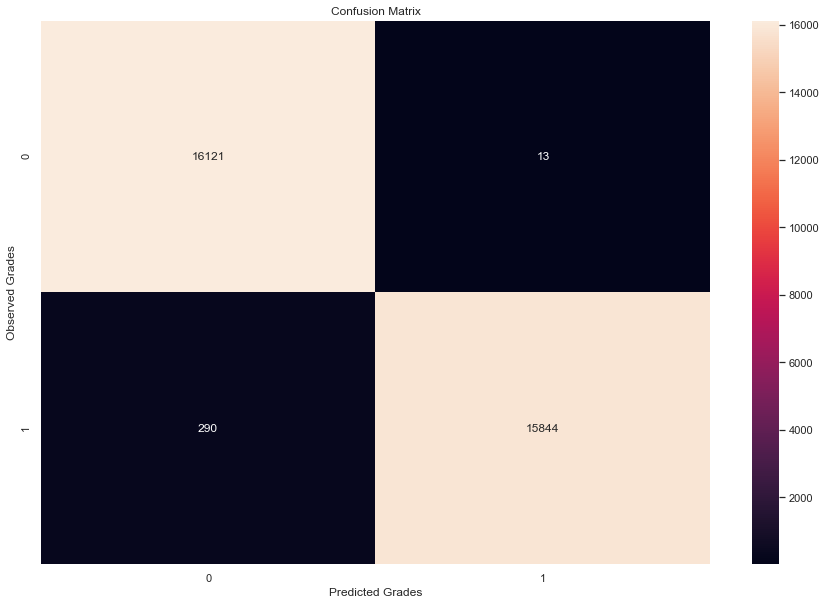

TEST
F1 Score: 0.9827002632568634
ROC: 0.9711626637278642
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.81      0.97      0.89       734
         pay       1.00      0.97      0.98      5390

    accuracy                           0.97      6124
   macro avg       0.90      0.97      0.93      6124
weighted avg       0.97      0.97      0.97      6124



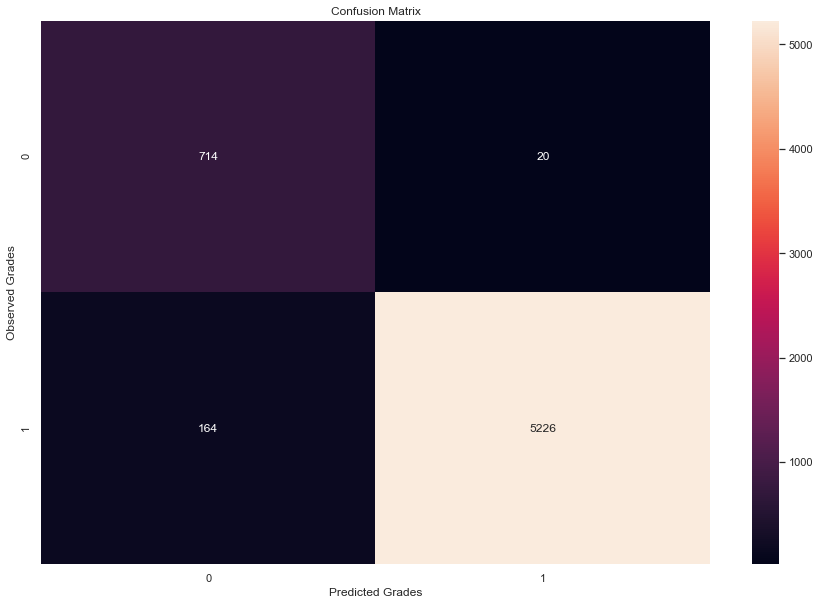

In [87]:
knn = KNeighborsClassifier()

# Feature Selection
# knn = RFECV(knn, scoring='roc_auc')

knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)

knn_classification_report = classification_report(y_test, knn_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = knn.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn.predict(X_test) 
f1_knn = f1_score(y_test, predictions_test)
roc_knn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_knn))
print(f"ROC: {roc_knn}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-2"></a>

In [ ]:
# parameter_grid = {'n_neighbors': [5,10,15,20],
#                   'weights': ['uniform', 'distance'],
#                   'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# grid_search = GridSearchCV(KNeighborsClassifier(),
#                            param_grid=parameter_grid,
#                            scoring='precision_weighted',
#                            cv=10,
#                            n_jobs=3,
#                            verbose=4)

knn_classifier = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [3,5,11,19],
                'weights': ['uniform','distance'],
                'p':[1,2],
                 'algorithm':['ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(knn_classifier, parameter_grid, scoring="roc_auc", n_jobs=-1, cv=10)
knn_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(knn_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = knn_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn_grid_search.predict(X_test) 
f1_knn_tun = f1_score(y_test, predictions_test)
roc_knn_tun = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_knn_tun))
print(f"ROC: {roc_knn_tun}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Support-Vector Machines <a class="anchor" id="support-vector-machines"></a>

In [ ]:
svc = SVC(probability=True)

# Feature Selection
svc = RFECV(svc, scoring='roc_auc')

svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

svm_classification_report = classification_report(y_test, svc_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = svc.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svc.predict(X_test) 
f1_svm = f1_score(y_test, predictions_test)
roc_svm = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_svm))
print(f"ROC: {roc_svm}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-3"></a>

In [ ]:
svm_classifier = SVC(probability=True)

parameter_grid = {'kernel': ['linear','rbf','poly']}

svm_grid_search = GridSearchCV(svm_classifier, scoring="roc_auc", cv=5, param_grid=parameter_grid)
svm_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(svm_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = svm_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svm = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svm_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svm = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Neural Networks <a class="anchor" id="neural-networks"></a>

In [ ]:
scaler = StandardScaler()

# Feature Selection
scaler = RFECV(scaler, scoring='roc_auc')

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train_nn, y_train)

predictions_test = ANNClassifier.predict(X_test_nn)

f1_nn = f1_score(y_test, predictions_test)
roc_nn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nn))
print(f"ROC: {roc_nn}")

confusion_matrix_ann = confusion_matrix(y_test,predictions_test)

nn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
print(classification_report(y_test,predictions_test))

sb.set(font_scale=1.0)

ax = plt.subplot()

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

best_nn_classification_report = nn_classification_report

### Parameter Tunning <a class="anchor" id="parameter-tunning-4"></a>

In [ ]:
parameter_grid = {'activation': ['tanh','identity','logistic','relu'],
                  'solver': ['adam','lbfgs','sgd'],
                  'hidden_layer_sizes': [3,5,8,13,21,34],
                  'verbose': [True]}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(ANNClassifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

In [ ]:
ANNClassifier = grid_search.best_estimator_
yk_pred = ANNClassifier.predict(X_test)

best_nn_classification_report = classification_report(y_test, yk_pred, output_dict=True)

print("--- Improved model ---\n")
print(f"Classification report:\n{best_nn_classification_report(y_test, yk_pred)}\n")

sb.set(font_scale=1.0)

ax = plt.subplot()

confusion_matrix_ann = confusion_matrix(y_test, yk_pred)

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Logistic Regression <a class="anchor" id="logistic-regression"></a>

In [ ]:
lr = LogisticRegression()

# Feature Selection
lr = RFECV(lr, scoring='roc_auc')

lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

lr_classification_report = classification_report(y_test, lr_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = lr.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = lr.predict(X_test) 
f1_lr = f1_score(y_test, predictions_test)
roc_lr = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_lr))
print(f"ROC: {roc_lr}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-5"></a>

In [ ]:
lr_classifier = LogisticRegression()

lr_grid_search = GridSearchCV(lr_classifier, scoring="roc_auc", cv=5, param_grid={})
lr_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(lr_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = lr_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = lr_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Naive Bayes <a class="anchor" id="naive-bayes"></a>

In [ ]:
nb = GaussianNB()

# Feature Selection
nb = RFECV(nb, scoring='roc_auc')

nb.fit(X_train, y_train)
nb_prediction = nb.predict(X_test)

nb_classification_report = classification_report(y_test, nb_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = nb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb.predict(X_test) 
f1_nb = f1_score(y_test, predictions_test)
roc_nb = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nb))
print(f"ROC: {roc_nb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()


### Parameter Tunning <a class="anchor" id="parameter-tunning-6"></a>

In [ ]:
nb_classifier = GaussianNB()

nb_grid_search = GridSearchCV(nb_classifier, scoring="roc_auc", cv=5, param_grid={})
nb_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(nb_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = nb_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Random Forest <a class="anchor" id="random-forest"></a>

In [ ]:
rf = RandomForestClassifier()

# Feature Selection
rf = RFECV(rf, scoring='roc_auc')

rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

rf_classification_report = classification_report(y_test, rf_prediction, output_dict=True)


print(53 * '=')
print("TRAIN")
predictions_train = rf.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf.predict(X_test) 
f1_rf = f1_score(y_test, predictions_test)
roc_rf = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_rf))
print(f"ROC: {f1_roc}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-7"></a>

In [ ]:
rf_classifier = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=5, param_grid={})
rf_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(rf_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = rf_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## XGBoost <a class="anchor" id="xgboost"></a>

In [ ]:
# xgb = XGBClassifier()

# Feature Selection
# xgb = RFECV(xgb, scoring='roc_auc')

# xgb.fit(X_train, y_train)
# xgb_prediction = xgb.predict(X_test)

# xgb_classification_report = classification_report(y_test, xgb_prediction, output_dict=True)

# print(f"Classification report:\n{classification_report(y_test, xgb_prediction, labels=np.unique(y_train))}\n")

# sb.set(font_scale=1.0)

# ax = plt.subplot()

# confusion_matrix_xgb = confusion_matrix(y_test, xgb_prediction)

# sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")

# ax.set_xlabel('Predicted Grades');
# ax.set_ylabel('Observed Grades');
# ax.set_title('Confusion Matrix');
# plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-8"></a>

#### [back](#index)
## MLP <a class="anchor" id="mlp"></a>

In [ ]:
mlp = MLPClassifier(alpha=1, max_iter=1000)

# Feature Selection
mlp = RFECV(mlp, scoring='roc_auc')

mlp.fit(X_train, y_train)
mlp_prediction = mlp.predict(X_test)

mlp_classification_report = classification_report(y_test, mlp_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = mlp.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = mlp.predict(X_test) 
f1_mlp = f1_score(y_test, predictions_test)
roc_mlp = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_mlp))
print(f"ROC: {roc_mlp}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-9"></a>

In [ ]:
mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)

mlp_grid_search = GridSearchCV(mlp_classifier, scoring="roc_auc", cv=10, param_grid={})
mlp_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(mlp_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = mlp_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = mlp_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Ada Boost <a class="anchor" id="ada-boost"></a>

In [ ]:
boost = AdaBoostClassifier()

# Feature Selection
boost = RFECV(boost, scoring='roc_auc')

boost.fit(X_train, y_train)
boost_prediction = boost.predict(X_test)

boost_classification_report = classification_report(y_test, boost_prediction, output_dict=True)

print(53 * '=')
print("TRAIN")
predictions_train = boost.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = boost.predict(X_test) 
f1_boost = f1_score(y_test, predictions_test)
roc_boost = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_boost))
print(f"ROC: {roc_boost}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-10"></a>

In [ ]:
ada_classifier = AdaBoostClassifier(random_state=0)

ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=3, param_grid={})
ada_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(ada_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = ada_grid_search.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_ada = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = ada_grid_search.predict(X_test) 
print("F1 Score: {}".format(f1_score(y_test, predictions_test)))
print(f"ROC: {roc_auc_score(y_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_ada = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

#### [back](#index)
## Voting <a class="anchor" id="voting"></a>

In [ ]:
# vote = VotingClassifier(
#      estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
#      voting='hard', weights=[1,1,1]
# )

# Feature Selection
# classifier = RFECV(vote, scoring='roc_auc')

# vote.fit(X_train, y_train)
# vote_prediction = vote.predict(X_test)

# vote_classification_report = classification_report(y_test, vote_prediction, output_dict=True)

# print(f"Classification report:\n{classification_report(y_test, vote_prediction, labels=np.unique(y_train))}\n")

# sb.set(font_scale=1.0)

# ax = plt.subplot()

# confusion_matrix_vote = confusion_matrix(y_test, vote_prediction)

# sb.heatmap(confusion_matrix_vote, annot=True, ax=ax, fmt="g")

# ax.set_xlabel('Predicted Grades');
# ax.set_ylabel('Observed Grades');
# ax.set_title('Confusion Matrix');
# plt.show()

In [ ]:
#table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal']),
#                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'XGB', 'MLP', 'BOOST', 'VOTE'], [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], xgb_classification_report['accuracy'], mlp_classification_report['accuracy'], boost_classification_report['accuracy'], vote_classification_report['accuracy']]]))
#                     ])

table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC Score Normal']),
                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'MLP', 'BOOST'], 
                                    [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], mlp_classification_report['accuracy'], boost_classification_report['accuracy']], 
                                   [f1_dt, f1_knn, f1_svm, f1_nn, f1_lr, f1_nb, f1_rf, f1_mlp, f1_boost], [roc_dt, roc_knn, roc_svm, roc_nn, roc_lr, roc_nb, roc_rf, roc_mlp, roc_boost]]))
                     ])

table.show()

In [ ]:
test_data_no_ids.info()

#### [back](#index)
## Apply Model <a class="anchor" id="apply-model"></a>

In [ ]:
test_inputs = test_data_no_ids.drop(columns=['status', 'loan_id'])

pred_comp = boost.predict_proba(test_inputs)

pred_comp = pd.DataFrame(pred_comp, columns=['col2', 'Predicted'])

pred_comp.drop('col2', axis=1, inplace=True)
all_ids_comp = pd.DataFrame(all_ids_comp, columns=['Id'])
# pred_comp = [(1-pred_comp[n]) for n in range(0, len(pred_comp))]
# print(pred_comp)
results = pd.concat([all_ids_comp, pred_comp], axis=1)
results = results.rename(columns={"loan_id":"Id"})
results.to_csv('results.csv', index = False)

print(results)